<a href="https://colab.research.google.com/github/jake31may/OutreachSVD/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVD Workspace - 15/02/2023 

This workspace will guide you through using single value decomposition (SVD) for image compression in python.

First, we will investigate compressing greyscale images, then extend the algorithm to include to colour images using RBG (red-blue-green). 

The workspace will investigate how easily different patterns can be compressed using flags. 

*Coding experience not necessary; knowledge of matrices and linear algebra is not required!* 


## Section 1: Importing images

Run the code below to download the images from GitHub into this workspace. This can be done by hovering the mouse over the code section below, then clicking the arrow on the left. This includes the images for the example and the main activity. 

In [1]:
!git clone https://github.com/jake31may/OutreachSVD.git # clones GitHub repository

Cloning into 'OutreachSVD'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 49 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), 4.21 MiB | 5.23 MiB/s, done.


We can now load the image of a pug. Initially, we will convert this in greyscale, but we will extrapolate the single vlaue decomposition algorithm into colour soon.

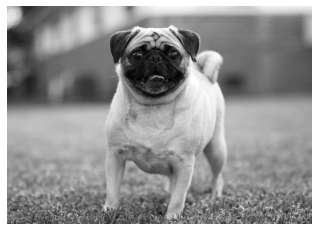

In [2]:
# Load in required libraries
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

A = imread('OutreachSVD/dog.jpg')   # reads in image file
X = np.mean(A,-1)       # convert RGB colour to grayscale
img = plt.imshow(X)     # sets image to variable 
img.set_cmap('gray')    # sets colour map to greyscale
plt.axis('off')         # removes axis lines from image
plt.show()              # displays image

Bits_bw = X.shape[0]*X.shape[1]*8

The above pug image is a 1070 x 1500 pixel image. Each pixel is represented by a value between 0 and 255 which is stored in an array or matrix which has 1070 rows and 1500 columns. Each value between 0 and 255 is a shade of colour, with 0 as black and 255 as white.

Click the below code to view the first 10 rows and 5 columns of the pug image matrix:

In [ ]:
print(X[1060:,:5])

[[104.          87.          80.66666667  81.33333333  16.66666667]
 [114.          99.66666667 118.33333333 129.          60.33333333]
 [132.          79.66666667  83.         126.         176.        ]
 [113.         122.66666667 161.         147.33333333 161.66666667]
 [188.66666667 174.33333333 152.         125.33333333 101.33333333]
 [134.66666667 112.33333333  99.33333333 110.33333333 125.        ]
 [101.66666667 102.66666667 108.33333333 109.33333333  92.66666667]
 [111.66666667 114.33333333 109.          77.          24.        ]
 [103.66666667  68.66666667  34.          16.           7.66666667]
 [ 62.33333333  24.33333333   7.66666667  10.          18.33333333]]


The information incorperated by the greyscale image is approximately 1.5 MB. The image size is actually 107 kB so has already undergone through some compression, which is evident given that the printed matrix above are not integers as exepected.  For the purposes of this workshop however, we will assume it is the full 1.6 MB size. 

## Section 2: Performing SVD on an image

In this session, we will show the how we can apply singular value decomposition to compress greyscale images. 

First, we apply the SVD on the greyscale image X.

In [ ]:
U, S, V = np.linalg.svd(X,full_matrices = False)
S = np.diag(S)

We now have 3 matrices: 
- U and S are both 1070 x 1070 matrices,
- VT is a 1070 x 1500 matrix

Right now, it is hard to see how this decomposition compresses the size of the image. Providing that some information is correlated, we can reduce the U, S and V matrices by selecting $n$ number of modes (corresponding to the columns of U & S and rows of S & V) to recombine the image:

- U is a 1070 x $n$ matrix,
- S is a $n$ x $n$
- V is $n$ x 1500

Using less modes will affect the image quality. Let's investigate how increasing $n$ affects the image quality:

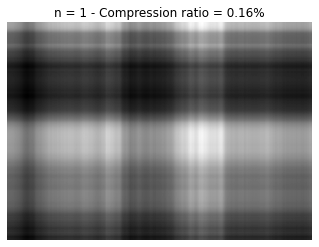

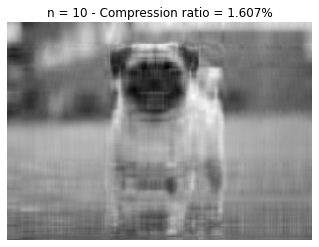

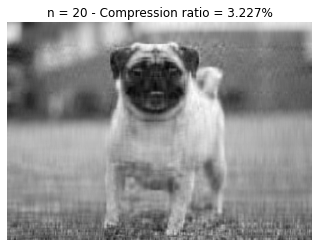

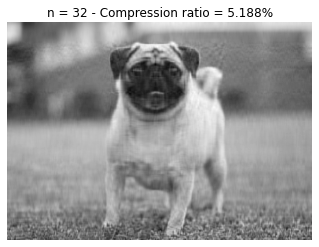

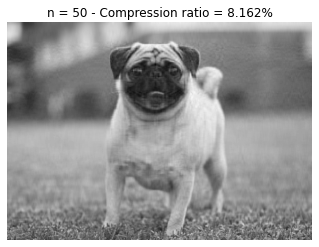

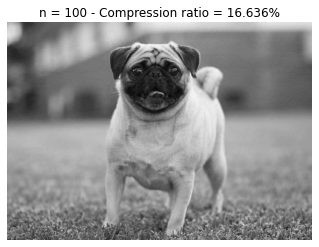

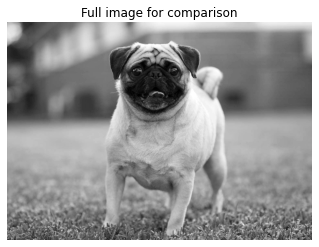

In [ ]:
j = 0
N = [1,10,20,32,50,100]
for n in N:
  X_approx = U[:,0:n] @ S[0:n,0:n] @ V[0:n,:]
  j += 1
  bits = (U.shape[0] + n + V.shape[1])*n*8
  comp_pc = np.round(100*bits/Bits_bw,3)
  
  plt.figure(j)
  img = plt.imshow(X_approx)
  img.set_cmap('gray')
  plt.title('n = ' + str(n) + ' - Compression ratio = ' + str(comp_pc) + '%')
  plt.axis('off')
  plt.show()

img = plt.imshow(X)
img.set_cmap('gray')
plt.title('Full image for comparison')
plt.axis('off')
plt.show()

As we increase the number of modes ($n$), we increase the quality. The singular values (the diagonal of matrix S) are ordered from largest to smallest. These numbers represent the "amount of energy" that mode has, and their importance. 

> *For those of you curious, replace "0:n" with "1:n" or "2:n" on line 4 in the above code to see the difference on the image.*



The first figure below plots how the singular value (energy) changes with mode number showing the changes on a logarithmic scale for the pug image. (The red dots indicate the modes used in the above example).

We can sum up this commulative energy and find the ratio between energy captured from to total energy. This is shown in the second figure. If we chose to save this image using 8 modes, we use approximately 8% of the memory to store the whole image, but save over 70% of the total energy. Including more modes has diminishing returns and may not make !

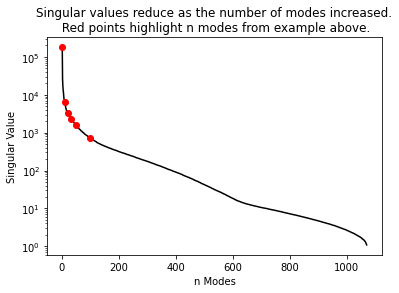

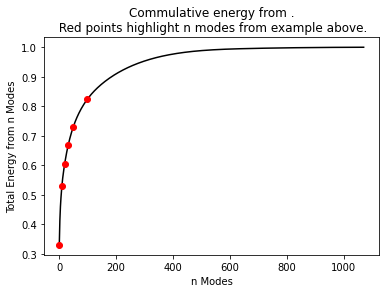

In [ ]:
plt.figure(1)
plt.semilogy(np.linspace(1,S.shape[1],S.shape[1]),np.diag(S),'k')
plt.plot([1,10,20,32,50,100],[np.diag(S)[0],np.diag(S)[9],np.diag(S)[19],np.diag(S)[32],np.diag(S)[49],np.diag(S)[99]],'ro')
plt.xlabel('n Modes'), plt.ylabel('Singular Value'), #plt.yscale('log')
plt.title('Singular values reduce as the number of modes increased.\n Red points highlight n modes from example above.')
#plt.legend('SVD Matrix','n Modes used in Example')
plt.show

plt.figure(2)
E = np.cumsum(np.diag(S))/sum(np.diag(S))
plt.plot(np.linspace(1,S.shape[1],S.shape[1]),E,'k')
plt.plot([1,10,20,32,50,100],[E[0],E[9],E[19],E[31],E[49],E[99]],'ro')
plt.xlabel('n Modes'), plt.ylabel('Total Energy from n Modes')
plt.title('Commulative energy from .\n Red points highlight n modes from example above.')
plt.show()

# Section 3: Colour images

We now extend the SVD algorithm to work with colour images. Typically these are formed by combining red, blue and green (RBG) pixels. The python code reads each colour into a three dimensional matrix (1070 x 1500 x 3). We could run the SVD algorithm for each colour, but this very inefficient. 

Instead, we can "reshape" the matrix into a two dimensional matrix that is three times as long. We can then perform a single SVD on the 1070 x (3*1500) matrix, chose the number of modes - $n$ - then shape to a 3D matrix once again. 

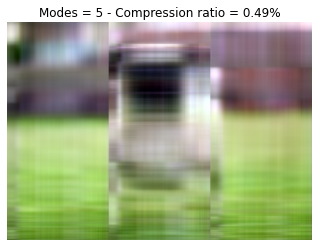

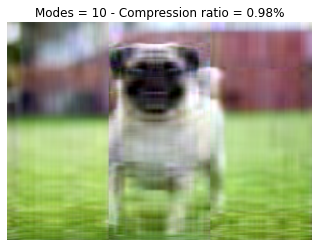

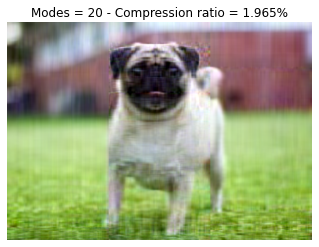

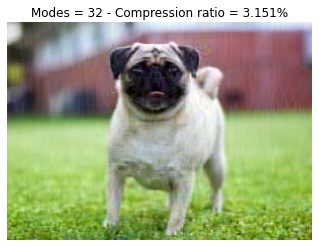

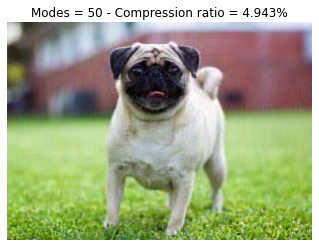

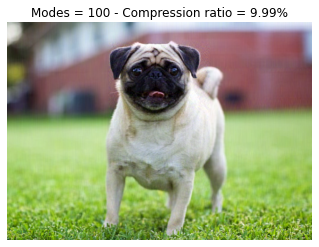

In [ ]:
A = imread('OutreachSVD/dog.jpg')   # reads in image file

B = A.transpose(0,1,2).reshape(3*A.shape[0],-1)     # Reshape 3D matrix A into 2D 
U, S, V = np.linalg.svd(B,full_matrices = False)   # Perform SVD
S = np.diag(S)

N = [5,10,20, 32,50,100]
Bits_im = B.shape[0]*B.shape[1]*8
if B[1,1] >= 1:
  div = 255
else:
    div = 1


j = 0
for n in N:
  X_approx = U[:,:n] @ S[:n,:n] @ V[:n,:]/div
  C = X_approx.transpose(0,1).reshape(A.shape)
  
  bits = (U.shape[0] + n + V.shape[1])*n*8
  comp_pc = np.round(100*bits/Bits_im,3)

  plt.figure(j+1)
  j += 1

  img = plt.imshow(C)
  plt.axis('off')
  plt.title('Modes = ' + str(n) + ' - Compression ratio = ' + str(comp_pc) + '%')
  
  plt.show()

Again we can check the singular value and cumulative energy plots:

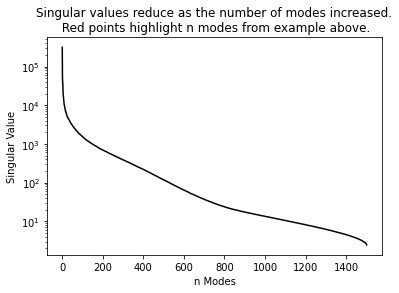

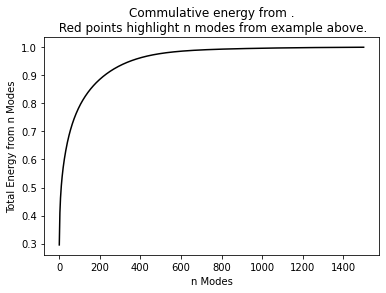

In [ ]:
plt.figure(1)
plt.semilogy(np.linspace(1,S.shape[1],S.shape[1]),np.diag(S),'k')
plt.xlabel('n Modes'), plt.ylabel('Singular Value'), #plt.yscale('log')
plt.title('Singular values reduce as the number of modes increased.\n Red points highlight n modes from example above.')
#plt.legend('SVD Matrix','n Modes used in Example')
plt.show

plt.figure(2)
E = np.cumsum(np.diag(S))/sum(np.diag(S))
plt.plot(np.linspace(1,S.shape[1],S.shape[1]),E,'k')
plt.xlabel('n Modes'), plt.ylabel('Total Energy from n Modes')
plt.title('Commulative energy from .\n Red points highlight n modes from example above.')
plt.show()

You may notice there are a greater number of modes than the greyscale image - this is expected as the matrix/image is (three times) larger. The plots still have a similar shape for the first 100 or so modes, showing that this image can be compressed reasonably well.

# Section 4: Flags

Let's now investigate how the complexity of flags changes the number of modes required to reconstruct.

In the folder, you will find a selection of flags that you may use. Feel free to download/upland your own! 

Here are some different flag designs that you could consider (not an extensive list by no means...)

Simple stripes: 
- Peru
- Austria (does vertical vs. horizontal matter?)

Diagonal:
- Scotland
- Jamaica
- Republic of Congo (Does a cross affect?)
- United Kingdom
- Bahrain

Orthogonal:
- Greece
- Georgia

Shaped: 
- Japan
- Maldives
- Greenland

Stars:
- USA
- Australia

Text (how many to be readable?):
- Brazil
- Belize
- Mayotte

Similar:
- Andorra
- Moldova (similar to Andorra)
- El Salvador
- Nicaragua

Others:
- British Indian Ocean Territories
- Bhutan
- Mozambique
- Nepal
- India



## SVD Code:

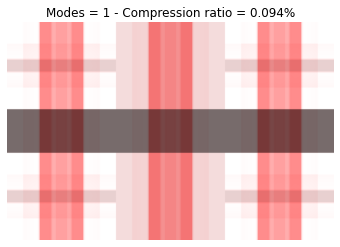

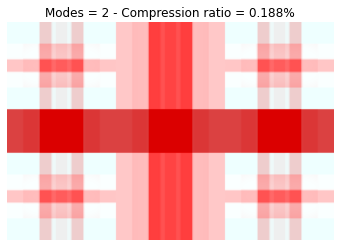

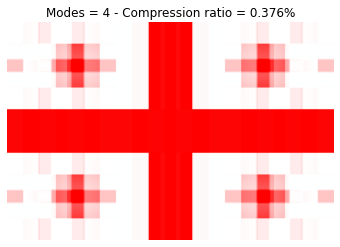

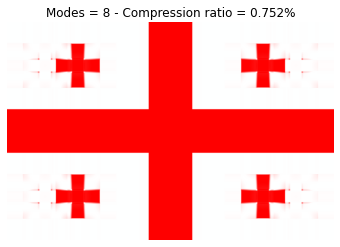

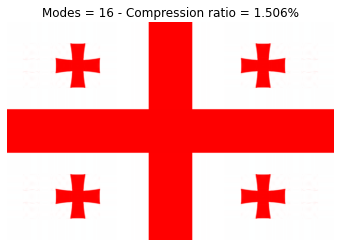

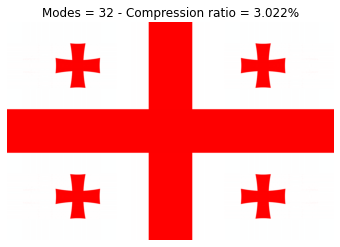

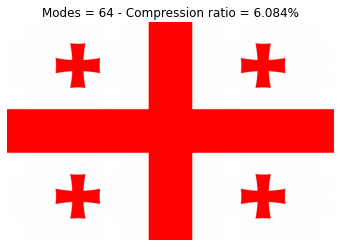

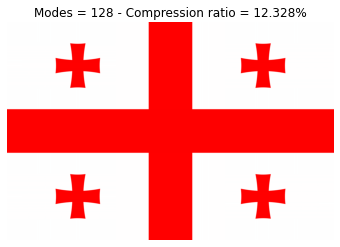

In [13]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

A = imread('OutreachSVD/Georgia.png')   # reads in image file

B = A.transpose(0,1,2).reshape(3*A.shape[0],-1)     # Reshape 3D matrix A into 2D 
U, S, V = np.linalg.svd(B,full_matrices = False)   # Perform SVD
S = np.diag(S)

N = [1,2,4,8,16,32,64,128]
Bits_im = B.shape[0]*B.shape[1]*8

if B[1,1] > 1:
  div = 255
else:
    div = 1


j = 0
for n in N:
  X_approx = U[:,:n] @ S[:n,:n] @ V[:n,:]/div
  C = X_approx.transpose(0,1).reshape(A.shape)
  
  bits = (U.shape[0] + n + V.shape[1])*n*8
  comp_pc = np.round(100*bits/Bits_im,3)

  plt.figure(j+1)
  j += 1

  img = plt.imshow(C)
  plt.axis('off')
  plt.title('Modes = ' + str(n) + ' - Compression ratio = ' + str(comp_pc) + '%')
  
  plt.show()

## Singular Value Plots:

In [ ]:
plt.figure(1)
plt.semilogy(np.linspace(1,S.shape[1],S.shape[1]),np.diag(S),'k')
plt.xlabel('n Modes'), plt.ylabel('Singular Value'), #plt.yscale('log')
plt.title('Singular values reduce as the number of modes increased.\n Red points highlight n modes from example above.')
#plt.legend('SVD Matrix','n Modes used in Example')
plt.show

plt.figure(2)
E = np.cumsum(np.diag(S))/sum(np.diag(S))
plt.plot(np.linspace(1,S.shape[1],S.shape[1]),E,'k')
plt.xlabel('n Modes'), plt.ylabel('Total Energy from n Modes')
plt.title('Commulative energy from .\n Red points highlight n modes from example above.')
plt.show()